## Домашняя работа 10

Файлы для задания: 

в папке - /projects/mipt_dbmp_biotechnology/genome/

Прочтения - illumina_reads_R1_001.fastq, illumina_reads_R2_001.fastq

Адаптеры - adapters.fa

1. Проведем анализ качества прочтений с помщью factqc с помощью команды
 fastqc /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R1_001.fastq -o .
 
 fastqc /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R2_001.fastq -o .
        
 На выходе получаем два html файла - R1_fastqc.html и R2_fastqc.html
        
2. Опишем какие проблемы наблюдаются для сырых файла

Во первых низкое качество прочтений в конце ридов, а также наличие адаптеров - рост Adapter Content в конце

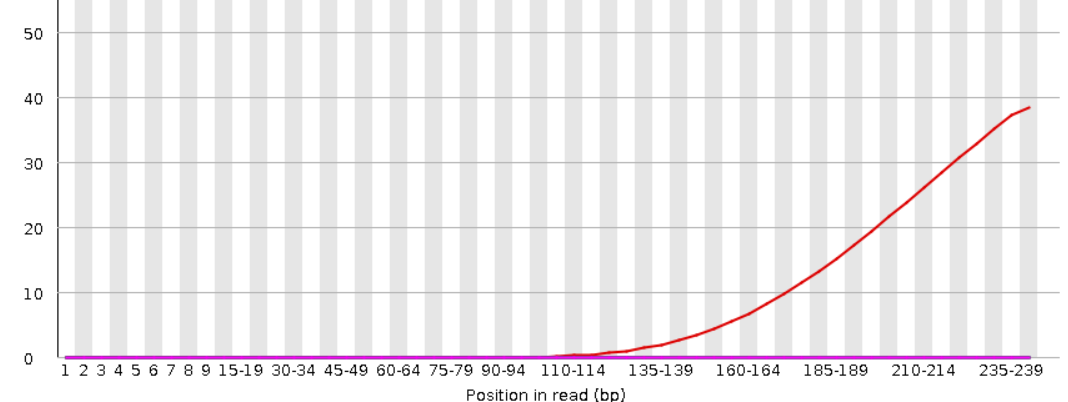


3. Проведем тримминг адаптеров и избавимся от низкокачественных оснований и коротких ридов

Будем использоват trimmomatic

Обрезка адаптеров -  ILLUMINACLIP:/projects/mipt_dbmp_biotechnology/genome/adapters.fa:2:30:10:2:true - парметры берем как семинаре 10

Удаление оснований в начале, обычно адаптеры -  HEADCROP:12

Обрезка низкокачественных оснований в начале и конце -  LEADING:3 TRAILING:3

Обрезка участков с низким качеством - SLIDINGWINDOW:4:20  

Удаление слишком коротких ридов -  MINLEN:45  (сначала брала 35 как на семинаре, вышло плохо)

4. Напишем скрипт для trimmomatic

#!/bin/bash
#SBATCH --job-name=trimmomatic
#SBATCH --output=trimmomatic.out
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --time=01:00:00

trimmomatic PE /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R1_001.fastq /projects/mipt_dbmp_biotechnology/genome/illumina_reads_R2_001.fastq trimmed_R1_paired.fastq trimmed_R2_paired.fastq trimmed_R1_unpaired.fastq trimmed_R2_unpaired.fastq ILLUMINACLIP:adapters.fa:2:20:10:2:true HEADCROP:12 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:20 MINLEN:45

5. Получаем новые fastq файлы 

Получили четыре файла, для R1 и R2 paired и unpaired. Повторно запустим fastqc для paired файлов командами :

fastqc  trimmed_R1_paired.fastq -o .
 
fastqc  trimmed_R2_paired.fastq -o .

Получаем новые два html файла - trim_R1_fastqc.html и trim_R2_fastqc.html

6. Изменения

Были исправлены проблемы с адаптерами, с качеством прочтений. Остались некоторые предупреждения, но они не красные, что значит в пределах допустимого.
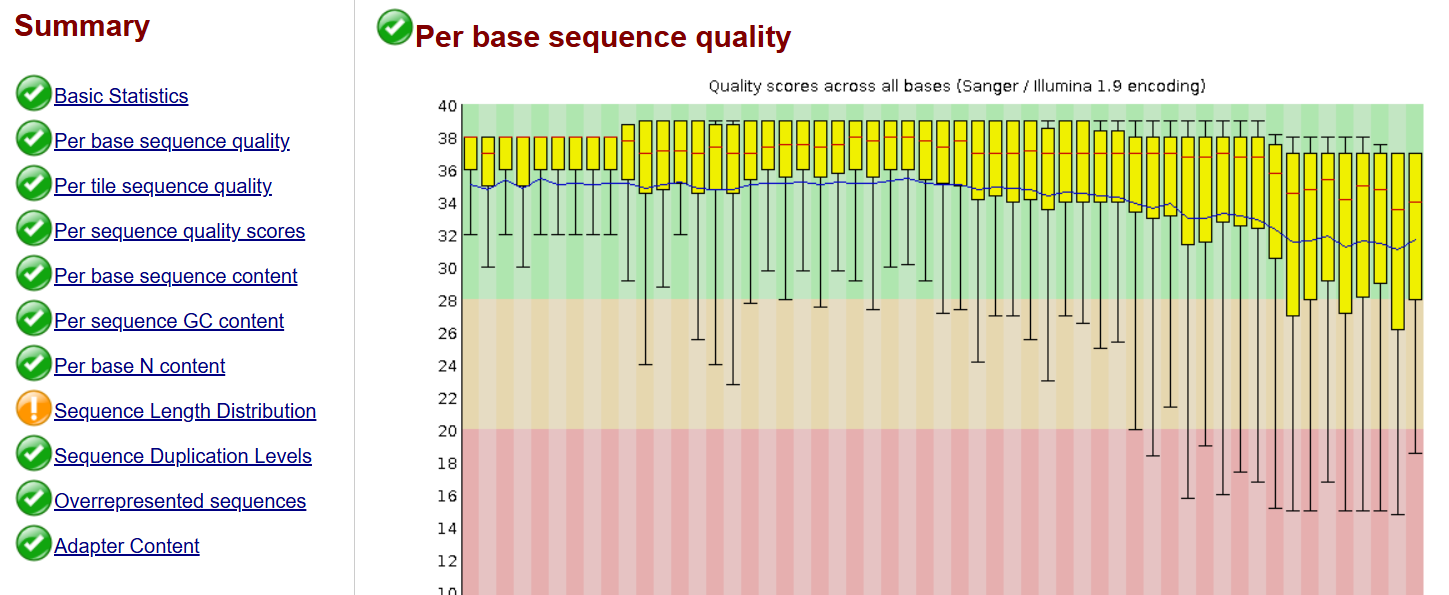
